## Titanic Prediction Model

##### Use Case: 
Model for assisting in Root Cause Analysis for fatalities in disasters in hotels.

- No scikitlearn, no ml library functions or classes.
- Only Models we have used in class.
    - Select the best model for the use case.
        - at least 85% accuracy (or recall etc...)
        - Go for the cheapest / simplest model
- Upload to github
    - Write a paragraph description of the project.

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

#### Data Import

In [2]:
df = pd.read_csv('TitanicPreprocessed.csv')
df

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,2,0,1,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,2,0,1,0,1
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,1,2,0,1,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
887,0,19.0,0,0,30.0000,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
888,0,18.0,1,2,23.4500,0,1,0,0,0,...,0,0,1,0,0,4,0,1,0,0
889,1,26.0,0,0,30.0000,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


#### Data Visualization

##### Correlation Plot Function

In [3]:
def plot_correlation(df):
    correlation = df.corr()['Survived'].drop('Survived')
    correlation = correlation.abs().sort_values()
    correlation.plot.bar()
    plt.show()

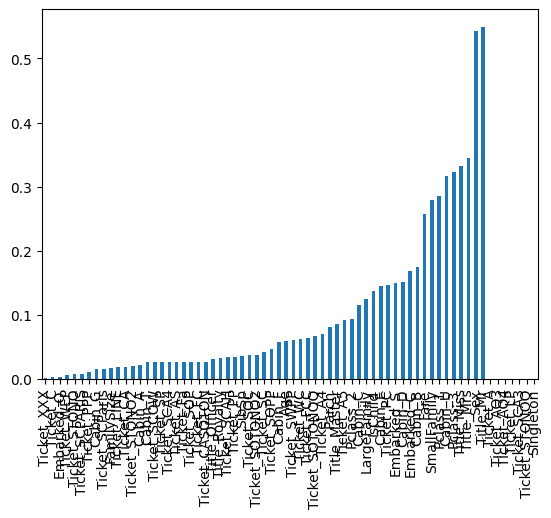

In [4]:
plot_correlation(df)

##### Pruning Dataset

In [5]:
df_pruned = df.copy()
df_pruned

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,2,0,1,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,2,0,1,0,1
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,1,2,0,1,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
887,0,19.0,0,0,30.0000,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
888,0,18.0,1,2,23.4500,0,1,0,0,0,...,0,0,1,0,0,4,0,1,0,0
889,1,26.0,0,0,30.0000,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


In [6]:
titles = df.columns.str.startswith('Title')
df_pruned = df.loc[:,~titles]
#df_pruned = df_pruned.drop('Singleton', axis=1)
df_pruned

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,2,0,1,0,0
1,0,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
2,0,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35.0,1,0,53.1000,0,0,1,0,0,...,0,0,0,0,1,2,0,1,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
887,0,19.0,0,0,30.0000,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
888,0,18.0,1,2,23.4500,0,0,1,0,0,...,0,0,1,0,0,4,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [7]:
#plot_correlation(df_pruned)

In [8]:
(df_pruned.corr()['Survived'].abs() >= .2).sum()

np.int64(7)

In [9]:
df_pruned = df_pruned.loc[:,df_pruned.corr().loc[:,'Survived'].abs() >= .2].copy()
df_pruned

,Sex,Fare,Cabin_U,Pclass_1,Pclass_3,SmallFamily,Survived
0,1,7.2500,1,0,1,1,0
1,0,71.2833,0,1,0,1,1
2,0,7.9250,1,0,1,0,1
3,0,53.1000,0,1,0,1,1
4,1,8.0500,1,0,1,0,0
...,...,...,...,...,...,...,...
886,1,13.0000,1,0,0,0,0
887,0,30.0000,0,1,0,0,1
888,0,23.4500,1,0,1,1,0
889,1,30.0000,0,1,0,0,1


In [10]:
df_pruned.loc[:,'Pclass_2'] = df['Pclass_2'].to_numpy()
#df_pruned = df_pruned.drop(['Cabin_U'], axis=1)
df_pruned

,Sex,Fare,Cabin_U,Pclass_1,Pclass_3,SmallFamily,Survived,Pclass_2
0,1,7.2500,1,0,1,1,0,0
1,0,71.2833,0,1,0,1,1,0
2,0,7.9250,1,0,1,0,1,0
3,0,53.1000,0,1,0,1,1,0
4,1,8.0500,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
886,1,13.0000,1,0,0,0,0,1
887,0,30.0000,0,1,0,0,1,0
888,0,23.4500,1,0,1,1,0,0
889,1,30.0000,0,1,0,0,1,0


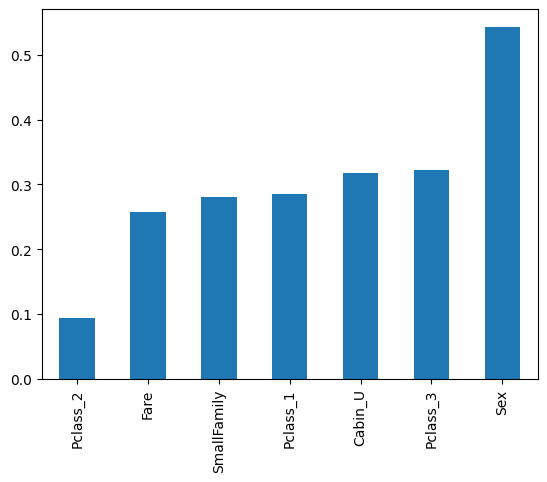

In [11]:
plot_correlation(df_pruned)

<Axes: >

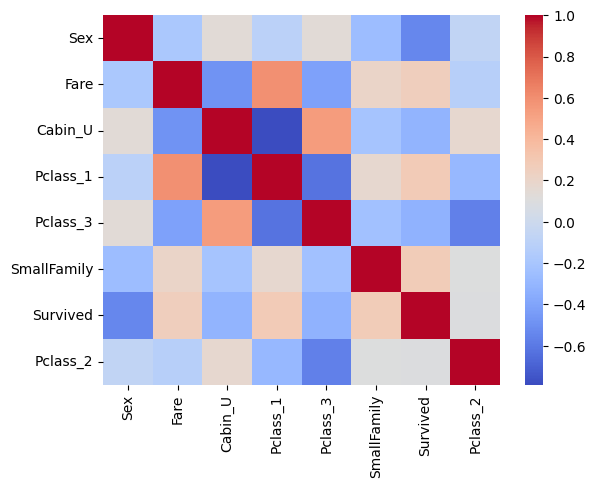

In [12]:
sns.heatmap(df_pruned.corr(),fmt='.1f', cmap='coolwarm' ,annot=False)

In [13]:
df_adjusted = df_pruned.copy()
df_adjusted['Fare'] *= 33
df_adjusted['Fare'] = df_adjusted['Fare'].round(2)
df_adjusted.sort_values('Fare')

,Sex,Fare,Cabin_U,Pclass_1,Pclass_3,SmallFamily,Survived,Pclass_2
806,1,0.00,0,1,0,0,0,0
413,1,0.00,1,0,0,0,0,1
481,1,0.00,1,0,0,0,0,1
466,1,0.00,1,0,0,0,0,1
179,1,0.00,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
341,0,8679.00,0,1,0,0,1,0
438,1,8679.00,0,1,0,0,0,0
679,1,16906.86,0,1,0,1,1,0
258,0,16906.86,1,1,0,0,1,0


In [14]:
df_adjusted['Class'] = np.zeros(df.shape[0], dtype=int)
for i in range(1,4):
    df_adjusted['Pclass_' + str(i)] *= -i + 4
    df_adjusted['Class'] += df_adjusted['Pclass_' + str(i)]
    df_adjusted.drop(['Pclass_' + str(i)], inplace=True, axis=1)
df_adjusted

,Sex,Fare,Cabin_U,SmallFamily,Survived,Class
0,1,239.25,1,1,0,1
1,0,2352.35,0,1,1,3
2,0,261.52,1,0,1,1
3,0,1752.30,0,1,1,3
4,1,265.65,1,0,0,1
...,...,...,...,...,...,...
886,1,429.00,1,0,0,2
887,0,990.00,0,0,1,3
888,0,773.85,1,1,0,1
889,1,990.00,0,0,1,3


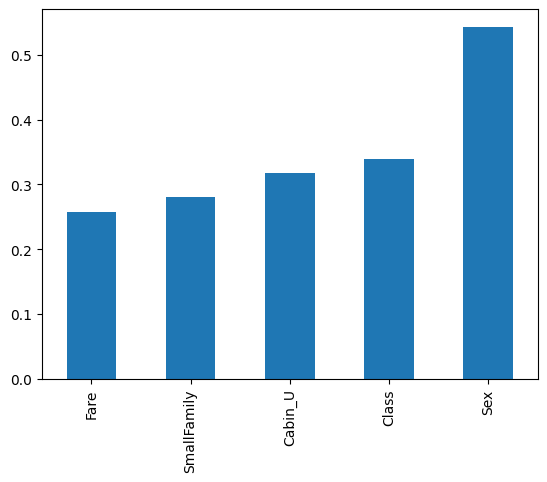

In [15]:
plot_correlation(df_adjusted)

<Axes: >

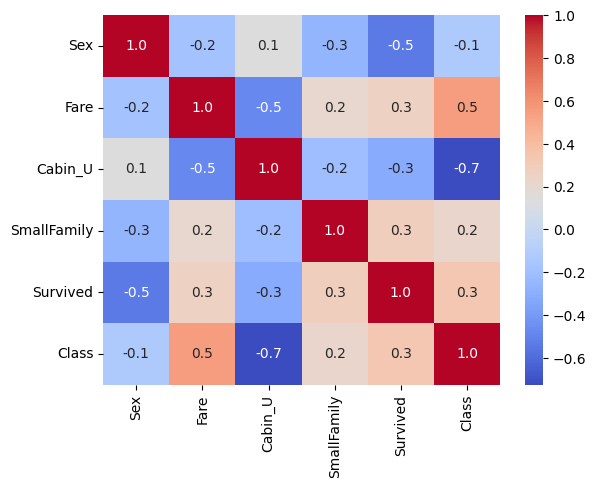

In [16]:
sns.heatmap(df_adjusted.corr(),fmt='.1f', cmap='coolwarm' ,annot=True)

In [17]:
cabins = df.columns.str.startswith('Cabin')
df.loc[:,cabins]

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,1
887,0,1,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,1
889,0,0,1,0,0,0,0,0,0


In [18]:
df_adjusted['Cabin'] = np.zeros(df.shape[0], dtype=int)
for i,c in enumerate('ABCDEFGTU'):
    df_adjusted['Cabin'] += df['Cabin_' + str(c)] * i
df_adjusted.drop('Cabin_U', axis=1,inplace=True)
df_adjusted

,Sex,Fare,SmallFamily,Survived,Class,Cabin
0,1,239.25,1,0,1,8
1,0,2352.35,1,1,3,2
2,0,261.52,0,1,1,8
3,0,1752.30,1,1,3,2
4,1,265.65,0,0,1,8
...,...,...,...,...,...,...
886,1,429.00,0,0,2,8
887,0,990.00,0,1,3,1
888,0,773.85,1,0,1,8
889,1,990.00,0,1,3,2


In [19]:
embarked = df.columns.str.startswith('Embarked')
df.loc[:,embarked]

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [20]:
tickets = df.columns.str.startswith('Ticket')
df_tickets = df.loc[:,tickets].copy()
df_tickets

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df_tickets['NT'] = np.zeros(df.shape[0], dtype=int)
for i,c in enumerate(df.loc[:,tickets].columns):
    df_tickets['NT'] += df[c] * i % 20
df_tickets = df_tickets['NT']
df_tickets

0       2
1      14
2      11
3      16
4      16
       ..
886    16
887    16
888    14
889    16
890    16
Name: NT, Length: 891, dtype: int64

##### Checking Distribution

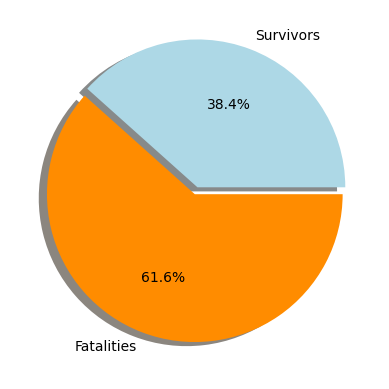

In [22]:
survival = df_adjusted['Survived'].sum()
plt.pie([survival, 891-survival], 
        labels=['Survivors', 'Fatalities'], 
        colors=['LightBlue','DarkOrange'], 
        autopct='%1.1f%%',
        explode=[0.05,0],
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.show()

##### Encoding Fare

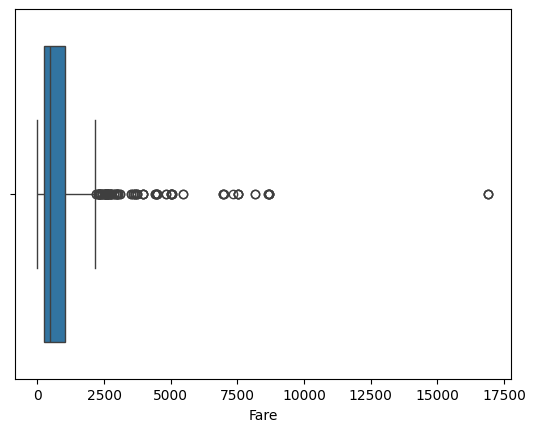

In [23]:
sns.boxplot(x=df_adjusted['Fare'])
plt.show()

In [24]:
df_adjusted.loc[df_adjusted['Fare'] == 0]['Fare'].count()

np.int64(15)

In [25]:
df_adjusted.loc[(df_adjusted['Fare'] > 0) & 
                (df_adjusted['Fare'] < 250)]['Fare'].count()

np.int64(77)

In [26]:
df_adjusted.loc[(df_adjusted['Fare'] >= 250) &
                 (df_adjusted['Fare'] < 300)]['Fare'].count()

np.int64(221)

In [27]:
df_adjusted.loc[(df_adjusted['Fare'] >= 300) & 
                (df_adjusted['Fare'] < 500)]['Fare'].count()

np.int64(148)

In [28]:
df_adjusted.loc[(df_adjusted['Fare'] >= 500) & 
                (df_adjusted['Fare'] < 1000)]['Fare'].count()

np.int64(198)

In [29]:
df_adjusted.loc[(df_adjusted['Fare'] >= 1000)]['Fare'].count()

np.int64(232)

In [30]:
def encode_fare(x):
    if(x == 0): #Crew
        return 0
    elif(x > 0 and x < 250): #Economy low end
        return 1
    elif(x >= 250 and x < 300): #Economy High End
        return 2
    elif(x >= 300 and x < 500): #Standard High End
        return 3
    elif(x >= 500 and x < 1000): #Luxury
        return 4
    elif(x >= 1000): # Exceptionally high
        return 5

In [31]:
df_encoded = df_adjusted.copy()
df_encoded['Fare'] = [encode_fare(i) for i  in df_encoded['Fare']]
df_encoded['Fare'].value_counts()

Fare
5    232
2    221
4    198
3    148
1     77
0     15
Name: count, dtype: int64

In [32]:
df_encodedII = df_adjusted.copy()
df_encodedII['Fare'] = df_encodedII['Fare']//250
df_encodedII['Fare'].value_counts()

Fare
1.0     369
3.0     120
0.0      92
2.0      78
4.0      42
10.0     28
6.0      25
7.0      24
5.0      19
9.0      18
14.0     11
11.0     11
8.0       8
17.0      7
20.0      7
34.0      6
12.0      4
15.0      4
30.0      4
27.0      4
67.0      3
32.0      2
19.0      2
21.0      2
29.0      1
Name: count, dtype: int64

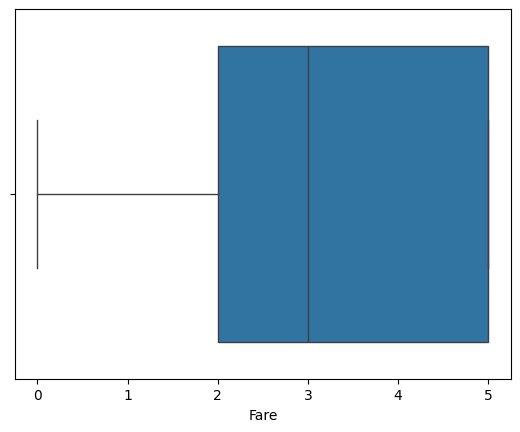

In [33]:
sns.boxplot(x=df_encoded['Fare'])
plt.show()

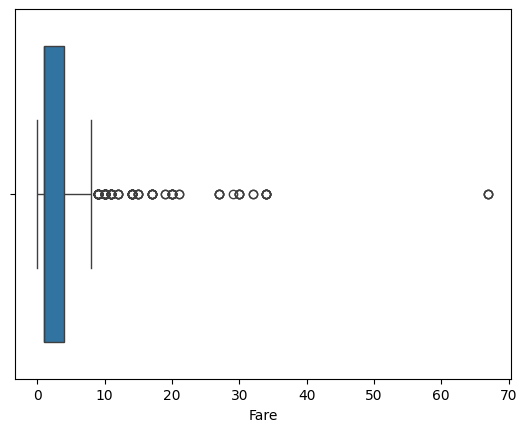

In [34]:
sns.boxplot(x=df_encodedII['Fare'])
plt.show()

In [35]:
df_encodedIII = df_adjusted.copy()
df_encodedIII['Fare'] *= 2
df_encodedIII.loc[df_encodedIII['Fare'] > 3000,'Fare' ] = 3000
df_encodedIII['Fare'] = df_encodedIII['Fare']//300
df_encodedIII['Fare'].value_counts()

Fare
1.0     297
10.0    171
2.0     120
5.0      85
3.0      69
6.0      56
4.0      37
8.0      19
7.0      17
0.0      16
9.0       4
Name: count, dtype: int64

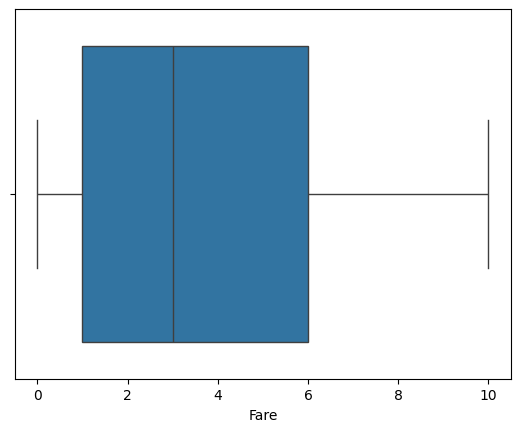

In [36]:
sns.boxplot(x=df_encodedIII['Fare'])
plt.show()

In [37]:
#df_adjusted.drop(['Fare'], axis=1, inplace=True)
df_adjusted = df_encoded.copy()
df_adjusted

,Sex,Fare,SmallFamily,Survived,Class,Cabin
0,1,1,1,0,1,8
1,0,5,1,1,3,2
2,0,2,0,1,1,8
3,0,5,1,1,3,2
4,1,2,0,0,1,8
...,...,...,...,...,...,...
886,1,3,0,0,2,8
887,0,4,0,1,3,1
888,0,4,1,0,1,8
889,1,4,0,1,3,2


### Models

#### Binary Logistic Regression

##### Functions

In [38]:
def sigmoid(h):
    return 1/(1+np.exp(-h))
def cross_entropy(y, p_hat):
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))
def accuracy(y,y_hat):
    return np.mean(y==y_hat)
def recall(y,y_hat):
    tp = 0
    fn = 0
    for i in range(len(y_hat)):
        if(y[i] == 1 and y_hat[i] == 1):
            tp+=1
        if(y[i] == 0 and y_hat[i] == 1):
            fn+=1
    if(tp+fn == 0):
        return 0
    return (tp)/(tp+fn)
def R2(y, y_hat):
    return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)

##### Logistic Regression Class

In [39]:
class LogisticRegression():
    def __init__(self, thresh=.5):
        self.W = None
        self.b = None
        self.thresh = thresh
    
    def fit(self, x, y, eta=1e-3, epochs=1e3, show_curve=True, seed = None ):
        epochs =int(epochs)
        N,D = x.shape

        #Initialization of Weights and Biases
        if(seed == None):
            self.seed = np.random.randint(10000)
            print(self.seed)
            np.random.seed(self.seed)
        else:
            self.seed = seed
            np.random.seed(seed)
        self.W = np.random.randn(D)
        self.b = np.random.randn(1)

        #Build Container for Loss
        J = np.zeros(epochs)

        #SGD Progession
        for epoch in range(epochs):
            p_hat = self.__forward__(x)
            J[epoch] = cross_entropy(y, p_hat)
            #Weights and Biases Update Rules
            self.W -= eta*(1/N)*x.T@(p_hat-y)
            self.b -= eta*(1/N)*np.sum(p_hat-y)
            pass
        
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel(r'$\mathcal{J}$')
            plt.title('Training Curve')
        pass
    def __forward__(self, x):
        return sigmoid(x@self.W+self.b)
    def predict(self,x):
        return (self.__forward__(x) >= self.thresh).astype(np.int32)
    def predict_percent(self,x):
        return (self.__forward__(x)).astype(np.float32)

##### Implementing Logistic Regression

In [40]:
#df_adjusted.drop(['Cabin'], axis=1,inplace=True)

In [41]:
#df_adjusted = pd.concat([df_adjusted,df.loc[:,embarked]],axis=1)
df_adjusted['FamilySize'] = df.loc[:,'FamilySize'].copy()
#df_adjusted['IsChild'] = df.loc[:,'IsChild'].copy()
df_adjusted = pd.concat([df_adjusted,df_tickets], axis=1)
df_adjusted

,Sex,Fare,SmallFamily,Survived,Class,Cabin,FamilySize,NT
0,1,1,1,0,1,8,2,2
1,0,5,1,1,3,2,2,14
2,0,2,0,1,1,8,1,11
3,0,5,1,1,3,2,2,16
4,1,2,0,0,1,8,1,16
...,...,...,...,...,...,...,...,...
886,1,3,0,0,2,8,1,16
887,0,4,0,1,3,1,1,16
888,0,4,1,0,1,8,4,14
889,1,4,0,1,3,2,1,16


In [42]:
df_adjusted['Age'] = df.loc[:,'Age'].copy()//10
df_adjusted['Fare'] = df.loc[:,'Fare'].copy()//20
df_adjusted

,Sex,Fare,SmallFamily,Survived,Class,Cabin,FamilySize,NT,Age
0,1,0.0,1,0,1,8,2,2,2.0
1,0,3.0,1,1,3,2,2,14,3.0
2,0,0.0,0,1,1,8,1,11,2.0
3,0,2.0,1,1,3,2,2,16,3.0
4,1,0.0,0,0,1,8,1,16,3.0
...,...,...,...,...,...,...,...,...,...
886,1,0.0,0,0,2,8,1,16,2.0
887,0,1.0,0,1,3,1,1,16,1.0
888,0,1.0,1,0,1,8,4,14,1.0
889,1,1.0,0,1,3,2,1,16,2.0


In [43]:
y = df_adjusted['Survived'].to_numpy()
X = df_adjusted.drop(['Survived'], axis=1).to_numpy()
(X,y)

(array([[ 1.,  0.,  1., ...,  2.,  2.,  2.],
        [ 0.,  3.,  1., ...,  2., 14.,  3.],
        [ 0.,  0.,  0., ...,  1., 11.,  2.],
        ...,
        [ 0.,  1.,  1., ...,  4., 14.,  1.],
        [ 1.,  1.,  0., ...,  1., 16.,  2.],
        [ 1.,  0.,  0., ...,  1., 16.,  3.]], shape=(891, 8)),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((596, 8), (295, 8), (596,), (295,))

- Seed 83
    - eta=9e-4
    - epochs=5e4
    - Training Accuracy:  0.8003
    - Training Recall:  0.7754
    - Testing Accuracy:  0.8305
    - Testing Recall:  0.8500
    - Whole Accuracy:  0.8103
    - Whole Recall:  0.8014

Training Accuracy:  0.8003
Training Recall:  0.7725
Testing Accuracy:  0.8271
Testing Recall:  0.8416
Whole Accuracy:  0.8092
Whole Recall:  0.7966


(0.8415841584158416, 0.7965517241379311)

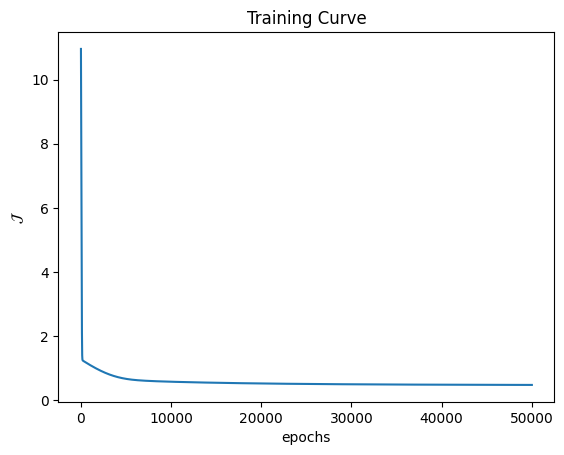

In [45]:
def run_regression(seed=83, curve=True):
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train, eta=9e-4, epochs = 5e4, seed=seed, show_curve=curve)
    y_hat = log_reg.predict(x_train)

    print(f"Training Accuracy: {accuracy(y_train,y_hat) : 0.4f}")
    print(f"Training Recall: {recall(y_train,y_hat) : 0.4f}")

    y_hat_test = log_reg.predict(x_test)
    print(f"Testing Accuracy: {accuracy(y_test,y_hat_test) : 0.4f}")
    print(f"Testing Recall: {recall(y_test,y_hat_test) : 0.4f}")

    y_hat_X = log_reg.predict(X)
    print(f"Whole Accuracy: {accuracy(y,y_hat_X) : 0.4f}")
    print(f"Whole Recall: {recall(y,y_hat_X) : 0.4f}")
    return (recall(y_test,y_hat_test),recall(y,y_hat_X))
run_regression()

In [46]:
seed = 0
recal_w = 0.0
recal_t = 0.0
while (recal_w < .80 and recal_t < .86):
    recal_t, recal_w = run_regression(curve=False)

Training Accuracy:  0.8003
Training Recall:  0.7725
Testing Accuracy:  0.8271
Testing Recall:  0.8416
Whole Accuracy:  0.8092
Whole Recall:  0.7966
Training Accuracy:  0.8003
Training Recall:  0.7725
Testing Accuracy:  0.8271
Testing Recall:  0.8416
Whole Accuracy:  0.8092
Whole Recall:  0.7966
Training Accuracy:  0.8003
Training Recall:  0.7725
Testing Accuracy:  0.8271
Testing Recall:  0.8416
Whole Accuracy:  0.8092
Whole Recall:  0.7966
Training Accuracy:  0.8003
Training Recall:  0.7725
Testing Accuracy:  0.8271
Testing Recall:  0.8416
Whole Accuracy:  0.8092
Whole Recall:  0.7966
Training Accuracy:  0.8003
Training Recall:  0.7725
Testing Accuracy:  0.8271
Testing Recall:  0.8416
Whole Accuracy:  0.8092
Whole Recall:  0.7966
Training Accuracy:  0.8003
Training Recall:  0.7725
Testing Accuracy:  0.8271
Testing Recall:  0.8416
Whole Accuracy:  0.8092
Whole Recall:  0.7966


KeyboardInterrupt: 

#### Implementing 2-layer Perceptron

#### Functions and Activiation

In [47]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K), dtype=int)
    for i in range(N):
        Y[i,y[i]] = 1
    return Y

def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def linear(H):
    return H
def Sigmoid(H):
    return 1/(1+np.exp(-H))
def ReLU(H):
    return H*(H>0)
def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis=1, keepdims=True)

#### Shallow ANN Class

In [48]:
class Shallow_ANN():

    def fit(self, X, y, neurons=6, 
            eta = 1e-3, epochs = 1e3, show_curve=True, seed=None):
        epochs = int(epochs)
        N,D = X.shape
        Y = one_hot_encode(y)
        K = Y.shape[1]

        #Initialize Weights and Biases
        if(seed == None):
            self.seed = np.random.randint(10000)
        else:
            self.seed = seed
        np.random.seed(self.seed)

        self.W = {l:np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
        self.B = {l:np.random.randn(M) for l,M in enumerate([neurons,K],1)}

        #Define Activations
        self.a = {1: np.tanh,2:softmax}

        #Loss Container
        J=np.zeros(epochs)

        #Gradient Descent Progression
        for epoch in range(epochs):
            self.__forward__(X)
            J[epoch]= cross_entropy(Y, self.Z[2])
            #Weight Update Rules for Layer 2
            self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
            self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)

            #Weight Update Rules for Layer 1
            self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T
                                        *(1-self.Z[1]**2))
            self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*
                                   (1-self.Z[1]**2)).sum(axis=0)
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel(r'$\mathcal{J}$')
            plt.title('Training Curve')
        pass
    def __forward__(self, X):
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])
            pass
        pass

    def predict(self, X):
        self.__forward__(X)
        return self.Z[2].argmax(axis=1)

    pass

eta=4e-3, epochs = 4e4
eta=4e-3, epochs = 5e4

eta=3e-3, epochs=4e4
7438
Training Accuracy:  0.8188
Training Recall:  0.8393
Testing Accuracy:  0.8102
Testing Recall:  0.8636
Whole Accuracy:  0.8159
Whole Recall:  0.8477

8327
Training Accuracy:  0.8070
Training Recall:  0.8242
Testing Accuracy:  0.8339
Testing Recall:  0.9080
Whole Accuracy:  0.8159
Whole Recall:  0.8532

eta=2e-2, epochs = 5e3
8327
Training Accuracy:  0.7970
Training Recall:  0.8741
Testing Accuracy:  0.7966
Testing Recall:  0.8947
Whole Accuracy:  0.7969
Whole Recall:  0.8815

eta=5e-2, epochs = 1e4
8327
Training Accuracy:  0.8003
Training Recall:  0.9402
Testing Accuracy:  0.7831
Testing Recall:  0.9242
Whole Accuracy:  0.7946
Whole Recall:  0.9344

 eta=3e-2, epochs = 1e4
 1012
Training Accuracy:  0.8171
Training Recall:  0.9313
Testing Accuracy:  0.8068
Testing Recall:  0.9200
Whole Accuracy:  0.8137
Whole Recall:  0.9272

4646
Training Accuracy:  0.8238
Training Recall:  0.9209
Testing Accuracy:  0.8068
Testing Recall:  0.9200
Whole Accuracy:  0.8182
Whole Recall:  0.9206

eta= 2.5e-2, epochs = 1e4

938
Training Accuracy:  0.8238
Training Recall:  0.9149
Testing Accuracy:  0.8136
Testing Recall:  0.9012
Whole Accuracy:  0.8204
Whole Recall:  0.9099

4646
Training Accuracy:  0.8339
Training Recall:  0.8289
Training R2:  0.2893
Testing Accuracy:  0.8373
Testing Recall:  0.8462
Testing R2:  0.2893


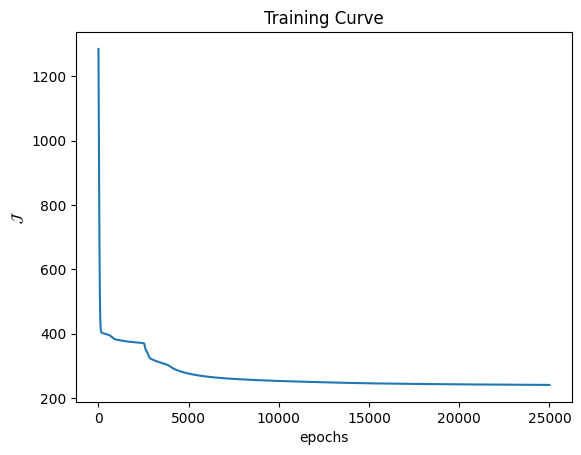

In [49]:
def run_SANN(curve=True, seed=None, eta=1e-2,epochs=2.5e4):
    ann = Shallow_ANN()
    ann.fit(x_train, y_train, eta= eta, epochs = epochs, show_curve=curve, seed=seed)
    print(ann.seed)
    y_hat = ann.predict(x_train)

    print(f"Training Accuracy: {accuracy(y_train,y_hat) : 0.4f}")
    print(f"Training Recall: {recall(y_train,y_hat) : 0.4f}")
    print(f"Training R2: {R2(y_train,y_hat) : 0.4f}")

    y_hat_test = ann.predict(x_test)
    print(f"Testing Accuracy: {accuracy(y_test,y_hat_test) : 0.4f}")
    print(f"Testing Recall: {recall(y_test,y_hat_test) : 0.4f}")
    print(f"Testing R2: {R2(y_train,y_hat) : 0.4f}")

    return (recall(y_test,y_hat_test),R2(y_test,y_hat_test),accuracy(y_test,y_hat_test), ann.seed)

output = run_SANN(seed=4646)

15044
Training Accuracy:  0.7617
Training Recall:  0.6600
Training R2: -0.0193
Testing Accuracy:  0.7729
Testing Recall:  0.7120
Testing R2: -0.0193


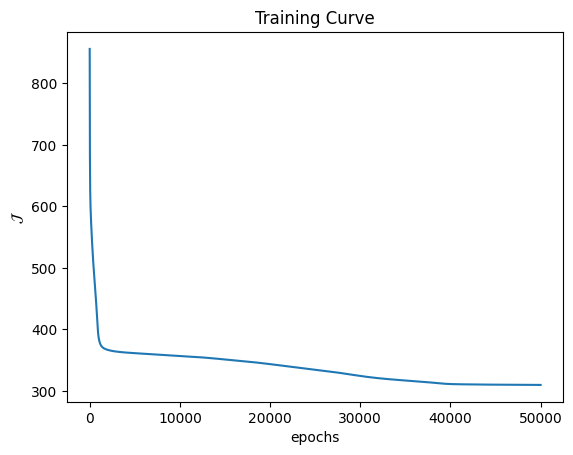

In [50]:
output = run_SANN(eta=2e-3,epochs=5e4, seed = 15044)

In [51]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [52]:
def test(model, eta, epochs, architecture=None, activations=None):
    try:
        accs= pd.DataFrame(columns=['seed','acc', 'recall', 'R2'])
        for i in range(np.random.randint(9999),999999, np.random.randint(999)):
            if(architecture is None):
                recall, r2, acc, seed = model(eta=eta,
                                                epochs=epochs, 
                                                curve=False, 
                                                seed = i)
            else:
                recall, r2, acc, seed = model(eta=eta,
                                                epochs=epochs, 
                                                curve=False, 
                                                seed = i,
                                                architecture=architecture,
                                                activations=activations)
            accs.loc[len(accs)] = [seed, acc, recall, r2]
            if(r2 > .70 or len(accs) > 100):       
                break
    except Exception as e:
        print(e)
        pass
    finally:
        accs['seed'] = accs['seed'].astype(int)
        print(accs.describe().drop('seed', axis=1))
        print(accs.sort_values(by='R2').tail().to_string(index=False))

- eta=1e-2,epochs=2.5e4     11.4s
    - 4646  .83 .88 .31
    - 21938 .84 .89 .27
- eta=2e-3,epochs=5e3       1.3s
    - 15044 .81 .84 .15
- eta=2e-3,epochs=8e3       2.5s
    - 44392 .82 .85 .19
    - 15044 .82 .85 .17

In [53]:
test(run_SANN,eta=2e-3,epochs=8e3)

1308
Training Accuracy:  0.6779
Training Recall:  0.6293
Training R2: -0.3782
Testing Accuracy:  0.6678
Testing Recall:  0.6667
Testing R2: -0.3782
1427
Training Accuracy:  0.6560
Training Recall:  0.8400
Training R2: -0.4716
Testing Accuracy:  0.6034
Testing Recall:  0.6154
Testing R2: -0.4716
1546
Training Accuracy:  0.7433
Training Recall:  0.6605
Training R2: -0.0983
Testing Accuracy:  0.7966
Testing Recall:  0.7542
Testing R2: -0.0983
1665
Training Accuracy:  0.6879
Training Recall:  0.6200
Training R2: -0.3352
Testing Accuracy:  0.6542
Testing Recall:  0.6047
Testing R2: -0.3352
1784
Training Accuracy:  0.6762
Training Recall:  0.5960
Training R2: -0.3854
Testing Accuracy:  0.6780
Testing Recall:  0.6582
Testing R2: -0.3854
        acc  recall     R2
count 5.000   5.000  5.000
mean  0.680   0.660 -0.326
std   0.071   0.059  0.295
min   0.603   0.605 -0.644
25%   0.654   0.615 -0.433
50%   0.668   0.658 -0.377
75%   0.678   0.667 -0.335
max   0.797   0.754  0.157
 seed   acc  reca

KeyboardInterrupt: 

#### Implementing Generalized ANN

#### ANN Functions

In [54]:
#Loss Functions
def cross_entropy(Y, P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

#Metrics
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

def R2(y, y_hat):
    return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)

In [55]:
def derivative(Z,a):
    if(a == linear):
        return 1
    elif( a ==Sigmoid):
        return Z*(1-Z)
    elif(a==np.tanh):
        return 1-Z**2
    elif(a==ReLU):
        return (Z>0).astype(int)
    else:
        ValueError("Uknown Activation, please ass the derivative here.")

#### ANN Class

In [62]:
class ANN():

    #Mode 1 = Regression, Mode = 0 Classification
    def __init__(self, architecture, activations=None, mode=0):
        self.mode=mode
        self.architecture = architecture
        self.activations = activations
        self.L = len(architecture) + 1 #Hidden layers + output


    def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve=True, seed=None):
        epochs = int(epochs)
        N,D = X.shape

        if self.mode:   #Regression Mode
            Y = y
            K = 1
            loss_func = OLS
            out_act = linear
        else:           #Classification Mode
            Y = one_hot_encode(y)
            K = Y.shape[1]
            loss_func = cross_entropy
            out_act = softmax

        #Initialize Weights and Biases
        if(seed is None):
            self.seed = np.random.randint(10000)
        else:
            self.seed = seed
        np.random.seed(self.seed)

        std_dev = np.sqrt(2/(N))

        self.W = {l:np.random.randn(M[0],M[1]) +std_dev for l,M 
                  in enumerate(zip(([D]+self.architecture),
                                   (self.architecture+[K])),1)}
        self.B = {l:np.random.randn(M) +std_dev for l,M 
                  in enumerate(self.architecture+[K],1)}

        #Define Activations
        if(self.activations is None):
            self.a = {l : ReLU for l in range(1,self.L)}
        else:
            self.a = {l: act for l,act in enumerate(self.activations,1)}
       
        # Final Layer Activation
        self.a[self.L] = out_act 

        #Loss Container
        J=np.zeros(epochs)

        #Gradient Descent Progression
        for epoch in range(epochs):
            self.__forward__(X)
            J[epoch]= loss_func(Y, self.Z[self.L])
            dH = (1/N)*(self.Z[self.L]-Y)

            #Back-Propagtion
            for l in sorted(self.W.keys(), reverse=True):

                dW =self.Z[l-1].T@dH
                dB = dH.sum(axis=0)

                self.W[l] -= eta*dW
                self.B[l] -= eta*dB

                if(l > 1):
                    dZ = dH@self.W[l].T
                    dH = dZ*derivative(self.Z[l-1],self.a[l-1])
            pass
        pass

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel(r'$\mathcal{J}$')
            plt.title('Training Curve')
        pass

    def __forward__(self, X):
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])
            pass
        pass

    def predict(self, X):
        self.__forward__(X)
        if(self.mode):
            return self.Z[self.L]
        return self.Z[self.L].argmax(axis=1)

    pass

621
Training Accuracy:  0.7081
Training Recall:  0.7727
Training R2: -0.2490
Testing Accuracy:  0.6780
Testing Recall:  0.7660
Testing R2: -0.2490


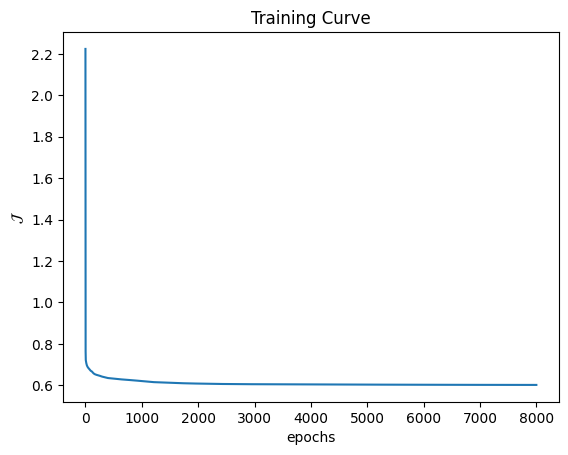

In [63]:
def run_ANN(curve=True, seed=None, eta=1e-2,epochs=2.5e4, architecture=[6,5,4], activations=[np.tanh,ReLU,ReLU]):
    ann = ANN(architecture, activations=activations)
    ann.fit(x_train, y_train, eta= eta, epochs = epochs, show_curve=curve, seed=seed)
    print(ann.seed)
    y_hat = ann.predict(x_train)

    print(f"Training Accuracy: {accuracy(y_train,y_hat) : 0.4f}")
    print(f"Training Recall: {recall(y_train,y_hat) : 0.4f}")
    print(f"Training R2: {R2(y_train,y_hat) : 0.4f}")

    y_hat_test = ann.predict(x_test)
    print(f"Testing Accuracy: {accuracy(y_test,y_hat_test) : 0.4f}")
    print(f"Testing Recall: {recall(y_test,y_hat_test) : 0.4f}")
    print(f"Testing R2: {R2(y_train,y_hat) : 0.4f}")

    return (recall(y_test,y_hat_test),R2(y_test,y_hat_test),accuracy(y_test,y_hat_test), ann.seed)

output = run_ANN(eta=9e-3,epochs=8e3, architecture=[8,6,7,2], activations=[np.tanh,ReLU,ReLU, ReLU])

- eta=9e-3,epochs=8e3, architecture=[8,6,4,2], activations=[np.tanh,ReLU,ReLU, ReLU] 3.7   
    - 24000 .83 .82 .29

- eta=9e-3,epochs=8e3, architecture=[8,6,7,2], activations=[np.tanh,ReLU,ReLU, ReLU] 3.0s
    - 3118 .83 .86 .21

- eta=9e-3,epochs=8e3, architecture=[8,6,7,2], activations=[np.tanh,ReLU,ReLU, ReLU] 3.4s
    - 10306 .85 .85 .23
    - 14110 .84 .86 .24

In [64]:
test(run_ANN, eta=9e-3,epochs=8e3, architecture=[8,6,7,2], activations=[np.tanh,ReLU,ReLU, ReLU])

6072
Training Accuracy:  0.6275
Training Recall:  0.0000
Training R2: -0.5936
Testing Accuracy:  0.5932
Testing Recall:  0.0000
Testing R2: -0.5936
6982
Training Accuracy:  0.7299
Training Recall:  0.9692
Training R2: -0.1557
Testing Accuracy:  0.6780
Testing Recall:  0.9310
Testing R2: -0.1557
7892
Training Accuracy:  0.7030
Training Recall:  0.6829
Training R2: -0.2706
Testing Accuracy:  0.6915
Testing Recall:  0.7101
Testing R2: -0.2706
8802
Training Accuracy:  0.7601
Training Recall:  0.7453
Training R2: -0.0265
Testing Accuracy:  0.7627
Testing Recall:  0.7778
Testing R2: -0.0265
9712
Training Accuracy:  0.6309
Training Recall:  1.0000
Training R2: -0.5792
Testing Accuracy:  0.5932
Testing Recall:  0.0000
Testing R2: -0.5792
10622
Training Accuracy:  0.6326
Training Recall:  1.0000
Training R2: -0.5720
Testing Accuracy:  0.5966
Testing Recall:  1.0000
Testing R2: -0.5720
11532
Training Accuracy:  0.6275
Training Recall:  0.0000
Training R2: -0.5936
Testing Accuracy:  0.5932
Testin

KeyboardInterrupt: 